In [4]:
from keras.datasets import imdb
import numpy as np

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i -3, '?') for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


In [7]:
def vectorize(sequences):
    result = np.zeros(shape=(len(sequences), 10000))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            result[i, j] = 1
    return result

In [9]:
X_train = vectorize(train_data)
X_test = vectorize(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
from keras import layers
from keras import Sequential

In [67]:
model = Sequential([layers.Dense(64, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1, activation='sigmoid')])

In [68]:
model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

In [69]:
k = 10000
X_val = X_train[:k]
part_X_train = X_train[k: ]

y_val = y_train[:k]
part_y_train = y_train[k: ]

In [70]:
history = model.fit(part_X_train,
        part_y_train,
        batch_size=512,
        epochs=20,
        validation_data=(X_val, y_val))

Epoch 1/20
30/30 [==============================] - 6s 102ms/step - loss: 0.4860 - accuracy: 0.7762 - val_loss: 0.3087 - val_accuracy: 0.8766
Epoch 2/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2057 - accuracy: 0.9250 - val_loss: 0.2883 - val_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.1189 - accuracy: 0.9603 - val_loss: 0.3348 - val_accuracy: 0.8806
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.0703 - accuracy: 0.9790 - val_loss: 0.4017 - val_accuracy: 0.8751
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.0430 - accuracy: 0.9886 - val_loss: 0.4674 - val_accuracy: 0.8729
Epoch 6/20
30/30 [==============================] - 1s 41ms/step - loss: 0.0236 - accuracy: 0.9960 - val_loss: 0.5474 - val_accuracy: 0.8699
Epoch 7/20
30/30 [==============================] - 1s 46ms/step - loss: 0.0111 - accuracy: 0.9991 - val_loss: 0.6144 - val_accuracy: 0.8672
Epoch 8/20
3

In [71]:
import matplotlib.pyplot as plt

%matplotlib inline

In [72]:
model_hist = history.history

Text(0, 0.5, 'Loss')

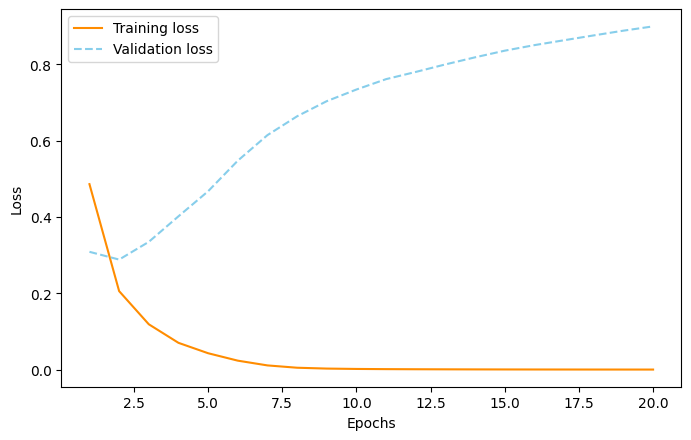

In [73]:
plt.figure(dpi=100, figsize=(8,5))
plt.plot(range(1, len(model_hist['loss']) + 1),
        model_hist['loss'],
        '-',
        color='darkorange',
        label='Training loss')
plt.plot(range(1, len(model_hist['loss']) + 1),
        model_hist['val_loss'],
        '--',
        color='skyblue',
        label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')

### As we can see model is clearly overfitting. To prevent this we can for example early stop at epoch number 2.

Text(0, 0.5, 'Accuracy %')

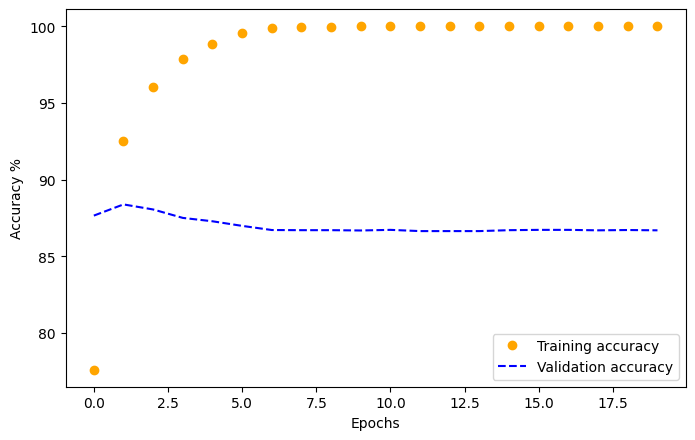

In [74]:
plt.figure(dpi=100, figsize=(8,5))
plt.plot(range(0, len(model_hist['loss'])),
        np.array(model_hist['accuracy'])*100,
        'o',
        color='orange',
        label='Training accuracy')
plt.plot(range(0, len(model_hist['loss'])),
        np.array(model_hist['val_accuracy'])*100,
        '--',
        color='blue',
        label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy %')

In [75]:
result = model.evaluate(X_test, y_test)
result


 10/782 [..............................] - ETA: 4s - loss: 0.8232 - accuracy: 0.8719 

2022-06-03 17:25:09.162955: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 4s 5ms/step - loss: 0.9853 - accuracy: 0.8556


[0.9853184223175049, 0.8556399941444397]

In [78]:
better_model = Sequential([layers.Dense(64, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(32, activation='relu'),
                        layers.Dense(1, activation='sigmoid')])
better_model.compile(optimizer='adam',
                    metrics=['accuracy'],
                    loss='binary_crossentropy')
better_model.fit(X_train, y_train, batch_size=512, epochs=2)
better_model.evaluate(X_test, y_test)

Epoch 1/2


2022-06-03 17:30:23.700961: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


49/49 [==============================] - 4s 40ms/step - loss: 0.4000 - accuracy: 0.8366
Epoch 2/2
49/49 [==============================] - 2s 33ms/step - loss: 0.1914 - accuracy: 0.9299


2022-06-03 17:30:34.156561: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 5s 5ms/step - loss: 0.3104 - accuracy: 0.8776


[0.3103760778903961, 0.8776400089263916]